<a href="https://colab.research.google.com/github/sudhakarmlal/EVA4/blob/master/Session9/S9_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [0]:
import datetime

In [0]:
x = datetime.datetime.now()

In [17]:
print(x)

2020-03-22 01:38:06.832530


In [18]:
print("Current Date/Time: ", datetime.datetime.now())

Current Date/Time:  2020-03-22 01:38:12.595213


In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [96]:
!cp -rf '/content/drive/My Drive/eva_apis/data_loaders' .
!cp -rf '/content/drive/My Drive/eva_apis/data_transformations' .
!cp -rf '/content/drive/My Drive/eva_apis/models' .
!cp -rf '/content/drive/My Drive/eva_apis/utils' .

cp: cannot stat '/content/drive/My Drive/eva_apis/data_loaders': No such file or directory
cp: cannot stat '/content/drive/My Drive/eva_apis/data_transformations': No such file or directory
cp: cannot stat '/content/drive/My Drive/eva_apis/models': No such file or directory
cp: cannot stat '/content/drive/My Drive/eva_apis/utils': No such file or directory


## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise. 


In [0]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomRotation((-8.0, 8.0), fill=(1,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [115]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


 bird   dog  ship   dog


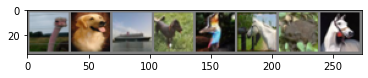

In [109]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Dataloader Arguments & Test/Train Dataloaders


# The model
Let's start with the model we first saw

In [0]:
import torch.nn.functional as F
dropout_value = 0.01
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Input Block = 32
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) 
        # output_size = 26
        # RF = 3

        # CONVOLUTION BLOCK 1

        # Input Block = 26
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=19, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) 
        # output_size = 24
        # RF = 5

        # TRANSITION BLOCK 1

        # Input Block = 24
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=35, out_channels=10, kernel_size=(3, 3), padding=1, bias=False),
        ) 
        # output_size = 22
        #RF = 7

        #Input = 22
        self.pool1 = nn.MaxPool2d(2, 2) 
        # output_size = 11
        #RF = 8


        # CONVOLUTION BLOCK 2

        #Input = 11
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=45, out_channels=10, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(10),
            nn.Dropout(dropout_value)
        ) 
        # output_size = 9
        # RF = 12

        #Input = 9
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=55, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) 
        # output_size = 7
        #RF = 16
        self.pool2 = nn.MaxPool2d(2, 2)
        #Input = 7
        
        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=36, out_channels=10, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(10),
            nn.Dropout(dropout_value)
        ) 
        
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=46, out_channels=10, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(10),
            nn.Dropout(dropout_value)
        ) 
        # output_size = 5
        # RF = 20

        # Input = 5
        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=56, out_channels=10, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(10),
            nn.Dropout(dropout_value)
        ) 
        # output_size = 3
        # RF = 24

        # OUTPUT BLOCK
        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=5)
        ) # output_size = 1
        self.convblock9 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
        ) 
        self.fc = nn.Linear(512, 10) 
        self.fc1 = nn.Linear(64*9*9, 1024)

        self.dropout = nn.Dropout(dropout_value)

    def forward(self, x):
        x2 = self.convblock1(x)
        x3 = self.convblock2(torch.cat((x, x2), dim=1))
        #x_t1=torch.cat((x,x2, x3), dim=1)
        x4 =self.pool1(torch.cat((x,x2, x3), dim=1))
        x5=self.convblock3(x4)
        x6=self.convblock4(torch.cat((x4, x5), dim=1))
        x7=self.convblock5(torch.cat((x4, x5,x6), dim=1))
        x8=self.pool2(torch.cat((x5,x6, x7), dim=1))
        x9=self.convblock8(x8)
        x10=self.convblock6(torch.cat((x8, x9), dim=1))
        x11=self.convblock7(torch.cat((x8, x9,x10), dim=1))
        x12 = self.gap(x11)
        #x13 = self.convblock9(x12)
        #print(x13.shape)
        x13 = x12.view(-1, 10)
        #print(x13)
        return F.log_softmax(x13, dim=-1)
        #x13 =
        #x4 = self.convblock3(x)
        #x = self.pool1(x)
        #x = self.convblock4(x)
        #x = self.convblock5(x)
        #x = self.convblock6(x)
        #x = self.convblock7(x)
        #x = self.gap(x)        
        #x = self.convblock8(x)

        #x = x.view(-1, 10)
        #return F.log_softmax(x, dim=-1)

# Model Params
Can't emphasize on how important viewing Model Summary is. 
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [139]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,736
              ReLU-6           [-1, 16, 32, 32]               0
       BatchNorm2d-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
         MaxPool2d-9           [-1, 35, 16, 16]               0
           Conv2d-10           [-1, 10, 16, 16]           3,150
           Conv2d-11           [-1, 10, 16, 16]           4,050
             ReLU-12           [-1, 10, 16, 16]               0
      BatchNorm2d-13           [-1, 10, 16, 16]              20
          Dropout-14           [-1

# Training and Testing

All right, so we have 24M params, and that's too many, we know that. But the purpose of this notebook is to set things right for our future experiments. 

Looking at logs can be boring, so we'll introduce **tqdm** progressbar to get cooler logs. 

Let's write train and test functions

In [0]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []



In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [142]:
for epoch in range(40):  # loop over the dataset multiple times

    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = model(inputs.cuda())
        loss = criterion(outputs, labels.cuda())
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.cuda()).sum().item()      

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f  Accuracy: %.2f' %
                  (epoch + 1, i + 1, running_loss / 2000, (100 * correct / total)))
            #print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 1.507  Accuracy: 45.96
[2,  2000] loss: 1.043  Accuracy: 63.65
[3,  2000] loss: 0.908  Accuracy: 68.58
[4,  2000] loss: 0.815  Accuracy: 71.34
[5,  2000] loss: 0.773  Accuracy: 73.05
[6,  2000] loss: 0.736  Accuracy: 74.38
[7,  2000] loss: 0.695  Accuracy: 76.04
[8,  2000] loss: 0.678  Accuracy: 76.76
[9,  2000] loss: 0.656  Accuracy: 77.52
[10,  2000] loss: 0.640  Accuracy: 78.07
[11,  2000] loss: 0.622  Accuracy: 78.68
[12,  2000] loss: 0.604  Accuracy: 79.36
[13,  2000] loss: 0.587  Accuracy: 79.76
[14,  2000] loss: 0.579  Accuracy: 79.79
[15,  2000] loss: 0.574  Accuracy: 79.96
[16,  2000] loss: 0.561  Accuracy: 80.56
[17,  2000] loss: 0.552  Accuracy: 81.03
[18,  2000] loss: 0.542  Accuracy: 81.29
[19,  2000] loss: 0.531  Accuracy: 81.71
[20,  2000] loss: 0.528  Accuracy: 81.67
[21,  2000] loss: 0.518  Accuracy: 81.83
[22,  2000] loss: 0.510  Accuracy: 82.27
[23,  2000] loss: 0.507  Accuracy: 82.23
[24,  2000] loss: 0.497  Accuracy: 82.63
[25,  2000] loss: 0.490  

GroundTruth:    cat  ship  ship plane


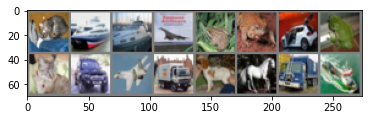

In [144]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:

outputs = model(images.to(device))

In [146]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  plane horse horse   car


In [148]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images.cuda())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.cuda()).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 8 %


In [143]:
from torch.optim.lr_scheduler import StepLR

model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=4, gamma=0.1)


EPOCHS = 40
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    scheduler.step()
    test(model, device, test_loader)

EPOCH: 0


NameError: ignored

Text(0.5, 1.0, 'Test Accuracy')

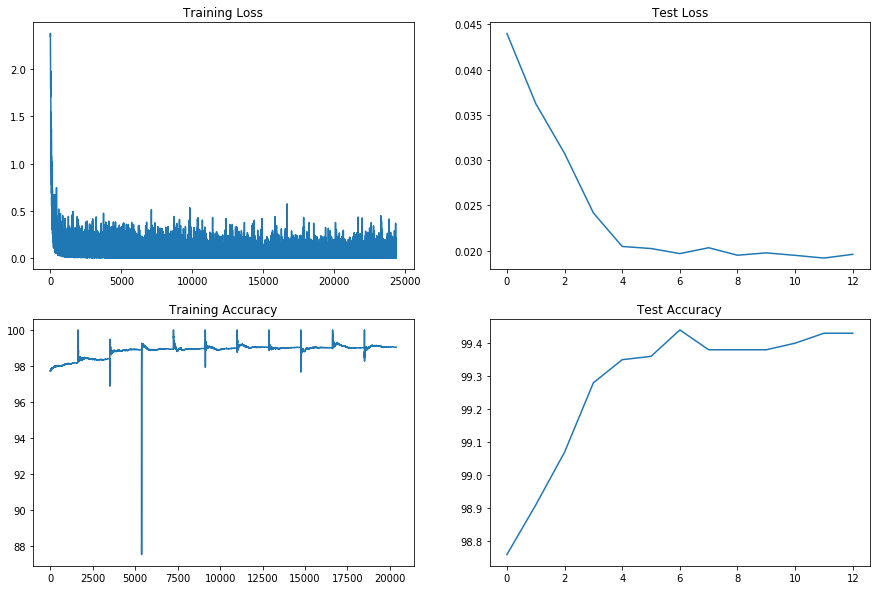

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc[4000:])
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")